In [14]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from LSTM import *
from LSTMbis import *
import pandas as pd
import numpy as np
import torch.utils.data as utils
import time

import pdb

torch.manual_seed(1)

In [15]:
import os
data = {}
a=0
for j in range(1,7):
    for i in os.listdir('./new_data/%s'%j):
        if i.endswith('.txt'):
            a = a+1
            data['%s'%a] = pd.read_csv('new_data/{}/{}'.format(j,i), header = None, 
                                        names = ['frameNb','id', 'x','y','Vx','Vy'],
                                           delimiter=' ')

In [16]:
a = 0
inputs = np.zeros([10,len(data),2])
gt = np.zeros([11,len(data),2])
in_coord = np.zeros([10,len(data),2])
gt_coord = np.zeros([11,len(data),2])

for i in data:
    inputs[:,a,:] = np.array(data['%s'%i].loc[0:9,['Vx','Vy']])
    gt[:,a,:] = np.array(data['%s'%i].loc[9:19,['Vx','Vy']])
    in_coord[:,a,:] = np.array(data['%s'%i].loc[0:9,['x','y']])
    gt_coord[:,a,:] = np.array(data['%s'%i].loc[9:19,['x','y']])
    a +=1


inputs = torch.from_numpy(inputs).float()
gt = torch.from_numpy(gt).float()
inputs = inputs.permute([1,0,2])
gt = gt.permute([1,0,2])

In [17]:
from torch import optim

lstm = LSTM(2)
optimizer = optim.SGD(lstm.parameters(), lr=0.05)
criterion = nn.MSELoss()

In [18]:
traindataset = utils.TensorDataset(inputs, gt[:,1:,:])
trainloader = utils.DataLoader(traindataset, batch_size=2, shuffle=True)

epochs = 100
steps = 0
print_every = 100
running_loss = 0 #### DOD

for e in range(epochs):
    start = time.time()
    for train_coord, ground_tru in iter(trainloader):
        steps += 1
        
        train_coord = train_coord.permute([1,0,2])
        ground_tru = ground_tru.permute([1,0,2])

        in_train = Variable(train_coord)
        targets = Variable(ground_tru)
        optimizer.zero_grad()
        #print(in_train.shape)
        #print(targets.shape)
        #pdb.set_trace()
        out = lstm.forward(in_train)
        loss = criterion(out, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]

    
        if steps % print_every == 0:
                stop = time.time()
                print("Epoch: {}/{}..".format(e+1, epochs),
                  "Loss: {:.4f}..".format(running_loss/print_every),
                  "{:.4f} s/batch".format((stop - start)/print_every)
                 )
                running_loss = 0
                start = time.time()

/Users/rodolphefarrando/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 1/100.. Loss: 0.1942.. 0.0031 s/batch
Epoch: 1/100.. Loss: 0.1891.. 0.0020 s/batch
Epoch: 1/100.. Loss: 0.1698.. 0.0019 s/batch
Epoch: 1/100.. Loss: 0.1470.. 0.0017 s/batch
Epoch: 1/100.. Loss: 0.1540.. 0.0023 s/batch
Epoch: 1/100.. Loss: 0.1377.. 0.0020 s/batch
Epoch: 1/100.. Loss: 0.1501.. 0.0021 s/batch
Epoch: 1/100.. Loss: 0.1393.. 0.0021 s/batch
Epoch: 1/100.. Loss: 0.1336.. 0.0021 s/batch
Epoch: 1/100.. Loss: 0.1151.. 0.0021 s/batch
Epoch: 1/100.. Loss: 0.1259.. 0.0021 s/batch
Epoch: 1/100.. Loss: 0.1408.. 0.0020 s/batch
Epoch: 2/100.. Loss: 0.1294.. 0.0012 s/batch
Epoch: 2/100.. Loss: 0.1487.. 0.0017 s/batch
Epoch: 2/100.. Loss: 0.1261.. 0.0020 s/batch
Epoch: 2/100.. Loss: 0.1312.. 0.0016 s/batch
Epoch: 2/100.. Loss: 0.1311.. 0.0019 s/batch
Epoch: 2/100.. Loss: 0.1245.. 0.0017 s/batch
Epoch: 2/100.. Loss: 0.1281.. 0.0021 s/batch
Epoch: 2/100.. Loss: 0.1149.. 0.0018 s/batch
Epoch: 2/100.. Loss: 0.1197.. 0.0021 s/batch
Epoch: 2/100.. Loss: 0.1382.. 0.0018 s/batch
Epoch: 2/1

Epoch: 15/100.. Loss: 0.1251.. 0.0022 s/batch
Epoch: 15/100.. Loss: 0.1094.. 0.0019 s/batch
Epoch: 15/100.. Loss: 0.1189.. 0.0023 s/batch
Epoch: 16/100.. Loss: 0.1314.. 0.0005 s/batch
Epoch: 16/100.. Loss: 0.1093.. 0.0022 s/batch
Epoch: 16/100.. Loss: 0.1280.. 0.0021 s/batch
Epoch: 16/100.. Loss: 0.1269.. 0.0023 s/batch
Epoch: 16/100.. Loss: 0.1056.. 0.0020 s/batch
Epoch: 16/100.. Loss: 0.1319.. 0.0023 s/batch
Epoch: 16/100.. Loss: 0.1127.. 0.0020 s/batch
Epoch: 16/100.. Loss: 0.1243.. 0.0022 s/batch
Epoch: 16/100.. Loss: 0.1178.. 0.0020 s/batch
Epoch: 16/100.. Loss: 0.1018.. 0.0022 s/batch
Epoch: 16/100.. Loss: 0.1090.. 0.0023 s/batch
Epoch: 16/100.. Loss: 0.1161.. 0.0020 s/batch
Epoch: 16/100.. Loss: 0.1199.. 0.0021 s/batch
Epoch: 17/100.. Loss: 0.1157.. 0.0016 s/batch
Epoch: 17/100.. Loss: 0.1212.. 0.0021 s/batch
Epoch: 17/100.. Loss: 0.1134.. 0.0019 s/batch
Epoch: 17/100.. Loss: 0.1224.. 0.0022 s/batch
Epoch: 17/100.. Loss: 0.1182.. 0.0019 s/batch
Epoch: 17/100.. Loss: 0.1131.. 0.0

Epoch: 30/100.. Loss: 0.1014.. 0.0021 s/batch
Epoch: 30/100.. Loss: 0.1173.. 0.0019 s/batch
Epoch: 30/100.. Loss: 0.1027.. 0.0022 s/batch
Epoch: 30/100.. Loss: 0.1078.. 0.0018 s/batch
Epoch: 30/100.. Loss: 0.1347.. 0.0022 s/batch
Epoch: 30/100.. Loss: 0.1137.. 0.0019 s/batch
Epoch: 30/100.. Loss: 0.1128.. 0.0021 s/batch
Epoch: 30/100.. Loss: 0.1156.. 0.0019 s/batch
Epoch: 31/100.. Loss: 0.1228.. 0.0008 s/batch
Epoch: 31/100.. Loss: 0.1106.. 0.0021 s/batch
Epoch: 31/100.. Loss: 0.1115.. 0.0031 s/batch
Epoch: 31/100.. Loss: 0.1122.. 0.0016 s/batch
Epoch: 31/100.. Loss: 0.1139.. 0.0020 s/batch
Epoch: 31/100.. Loss: 0.1289.. 0.0016 s/batch
Epoch: 31/100.. Loss: 0.1136.. 0.0021 s/batch
Epoch: 31/100.. Loss: 0.1296.. 0.0018 s/batch
Epoch: 31/100.. Loss: 0.1225.. 0.0021 s/batch
Epoch: 31/100.. Loss: 0.1044.. 0.0018 s/batch
Epoch: 31/100.. Loss: 0.1301.. 0.0021 s/batch
Epoch: 31/100.. Loss: 0.1147.. 0.0019 s/batch
Epoch: 32/100.. Loss: 0.0929.. 0.0002 s/batch
Epoch: 32/100.. Loss: 0.1209.. 0.0

Epoch: 44/100.. Loss: 0.1078.. 0.0020 s/batch
Epoch: 44/100.. Loss: 0.1209.. 0.0017 s/batch
Epoch: 45/100.. Loss: 0.1022.. 0.0020 s/batch
Epoch: 45/100.. Loss: 0.0958.. 0.0019 s/batch
Epoch: 45/100.. Loss: 0.1306.. 0.0020 s/batch
Epoch: 45/100.. Loss: 0.1294.. 0.0017 s/batch
Epoch: 45/100.. Loss: 0.1101.. 0.0020 s/batch
Epoch: 45/100.. Loss: 0.1104.. 0.0017 s/batch
Epoch: 45/100.. Loss: 0.1105.. 0.0020 s/batch
Epoch: 45/100.. Loss: 0.1176.. 0.0017 s/batch
Epoch: 45/100.. Loss: 0.1082.. 0.0020 s/batch
Epoch: 45/100.. Loss: 0.1215.. 0.0017 s/batch
Epoch: 45/100.. Loss: 0.1227.. 0.0020 s/batch
Epoch: 45/100.. Loss: 0.1168.. 0.0017 s/batch
Epoch: 46/100.. Loss: 0.1152.. 0.0012 s/batch
Epoch: 46/100.. Loss: 0.1051.. 0.0019 s/batch
Epoch: 46/100.. Loss: 0.1164.. 0.0022 s/batch
Epoch: 46/100.. Loss: 0.1182.. 0.0019 s/batch
Epoch: 46/100.. Loss: 0.1112.. 0.0022 s/batch
Epoch: 46/100.. Loss: 0.1147.. 0.0019 s/batch
Epoch: 46/100.. Loss: 0.1182.. 0.0022 s/batch
Epoch: 46/100.. Loss: 0.1204.. 0.0

Epoch: 59/100.. Loss: 0.1184.. 0.0021 s/batch
Epoch: 59/100.. Loss: 0.1032.. 0.0019 s/batch
Epoch: 59/100.. Loss: 0.1103.. 0.0024 s/batch
Epoch: 59/100.. Loss: 0.1106.. 0.0022 s/batch
Epoch: 59/100.. Loss: 0.1202.. 0.0025 s/batch
Epoch: 59/100.. Loss: 0.1153.. 0.0026 s/batch
Epoch: 60/100.. Loss: 0.1228.. 0.0002 s/batch
Epoch: 60/100.. Loss: 0.1223.. 0.0018 s/batch
Epoch: 60/100.. Loss: 0.1222.. 0.0022 s/batch
Epoch: 60/100.. Loss: 0.1136.. 0.0019 s/batch
Epoch: 60/100.. Loss: 0.1056.. 0.0022 s/batch
Epoch: 60/100.. Loss: 0.1220.. 0.0019 s/batch
Epoch: 60/100.. Loss: 0.1153.. 0.0020 s/batch
Epoch: 60/100.. Loss: 0.1131.. 0.0017 s/batch
Epoch: 60/100.. Loss: 0.1019.. 0.0040 s/batch
Epoch: 60/100.. Loss: 0.1089.. 0.0020 s/batch
Epoch: 60/100.. Loss: 0.1314.. 0.0021 s/batch
Epoch: 60/100.. Loss: 0.1143.. 0.0023 s/batch
Epoch: 60/100.. Loss: 0.1127.. 0.0085 s/batch
Epoch: 61/100.. Loss: 0.1110.. 0.0094 s/batch
Epoch: 61/100.. Loss: 0.1098.. 0.0085 s/batch
Epoch: 61/100.. Loss: 0.1232.. 0.0

Epoch: 74/100.. Loss: 0.1231.. 0.0012 s/batch
Epoch: 74/100.. Loss: 0.1026.. 0.0021 s/batch
Epoch: 74/100.. Loss: 0.1127.. 0.0021 s/batch
Epoch: 74/100.. Loss: 0.1327.. 0.0023 s/batch
Epoch: 74/100.. Loss: 0.1113.. 0.0021 s/batch
Epoch: 74/100.. Loss: 0.1206.. 0.0022 s/batch
Epoch: 74/100.. Loss: 0.1030.. 0.0021 s/batch
Epoch: 74/100.. Loss: 0.1142.. 0.0020 s/batch
Epoch: 74/100.. Loss: 0.1144.. 0.0021 s/batch
Epoch: 74/100.. Loss: 0.1100.. 0.0017 s/batch
Epoch: 74/100.. Loss: 0.1176.. 0.0020 s/batch
Epoch: 74/100.. Loss: 0.1125.. 0.0017 s/batch
Epoch: 75/100.. Loss: 0.1171.. 0.0006 s/batch
Epoch: 75/100.. Loss: 0.1221.. 0.0017 s/batch
Epoch: 75/100.. Loss: 0.0982.. 0.0020 s/batch
Epoch: 75/100.. Loss: 0.1204.. 0.0018 s/batch
Epoch: 75/100.. Loss: 0.1047.. 0.0021 s/batch
Epoch: 75/100.. Loss: 0.1080.. 0.0017 s/batch
Epoch: 75/100.. Loss: 0.1053.. 0.0020 s/batch
Epoch: 75/100.. Loss: 0.1147.. 0.0017 s/batch
Epoch: 75/100.. Loss: 0.1217.. 0.0020 s/batch
Epoch: 75/100.. Loss: 0.1232.. 0.0

Epoch: 88/100.. Loss: 0.1060.. 0.0021 s/batch
Epoch: 88/100.. Loss: 0.1259.. 0.0041 s/batch
Epoch: 88/100.. Loss: 0.1218.. 0.0025 s/batch
Epoch: 88/100.. Loss: 0.1155.. 0.0050 s/batch
Epoch: 88/100.. Loss: 0.1262.. 0.0018 s/batch
Epoch: 88/100.. Loss: 0.1083.. 0.0020 s/batch
Epoch: 89/100.. Loss: 0.1073.. 0.0014 s/batch
Epoch: 89/100.. Loss: 0.1210.. 0.0020 s/batch
Epoch: 89/100.. Loss: 0.1191.. 0.0018 s/batch
Epoch: 89/100.. Loss: 0.0987.. 0.0021 s/batch
Epoch: 89/100.. Loss: 0.1209.. 0.0018 s/batch
Epoch: 89/100.. Loss: 0.1130.. 0.0021 s/batch
Epoch: 89/100.. Loss: 0.1053.. 0.0018 s/batch
Epoch: 89/100.. Loss: 0.1187.. 0.0022 s/batch
Epoch: 89/100.. Loss: 0.1164.. 0.0019 s/batch
Epoch: 89/100.. Loss: 0.1215.. 0.0023 s/batch
Epoch: 89/100.. Loss: 0.1282.. 0.0017 s/batch
Epoch: 89/100.. Loss: 0.1082.. 0.0021 s/batch
Epoch: 90/100.. Loss: 0.0984.. 0.0037 s/batch
Epoch: 90/100.. Loss: 0.1031.. 0.0070 s/batch
Epoch: 90/100.. Loss: 0.1114.. 0.0106 s/batch
Epoch: 90/100.. Loss: 0.1169.. 0.0

In [19]:
inputs = inputs.permute([1,0,2])
output_final = lstm.predict(inputs)
output_final = output_final.data.numpy()

## Post processing step
Go back to coordinate:
We have Vx and Vy and we want x and y.
$ V = d/t$
$ d = V*t$
Here t = 0.4s between each point.
Start from data at index 9. Then we add d_x and d_y to the last x and y.

In [20]:
output_coord=np.zeros([11,len(data),2])
for j in range(11):
    for i in range(len(data)):
        if j==0:
            output_coord[j,i,:] = in_coord[9,i,:]
        else:
            output_coord[j,i,:] = output_coord[j-1,i,:]+output_final[j-1,i,:]*0.4
        

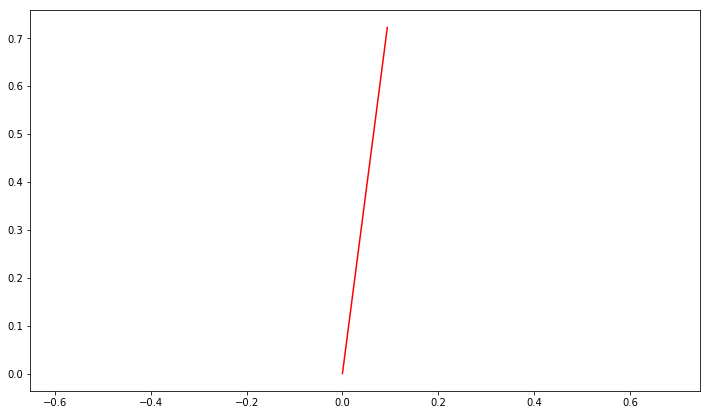

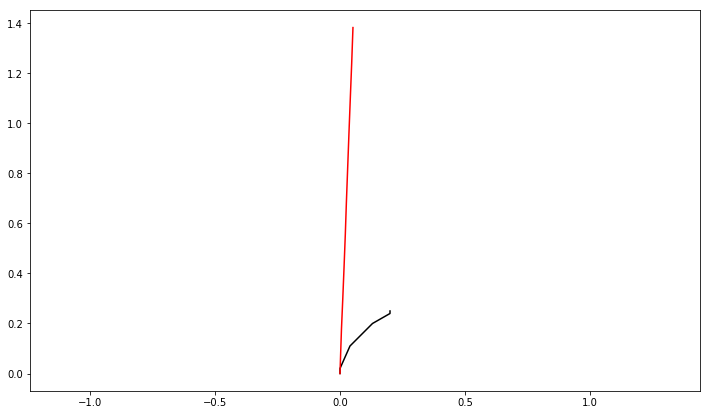

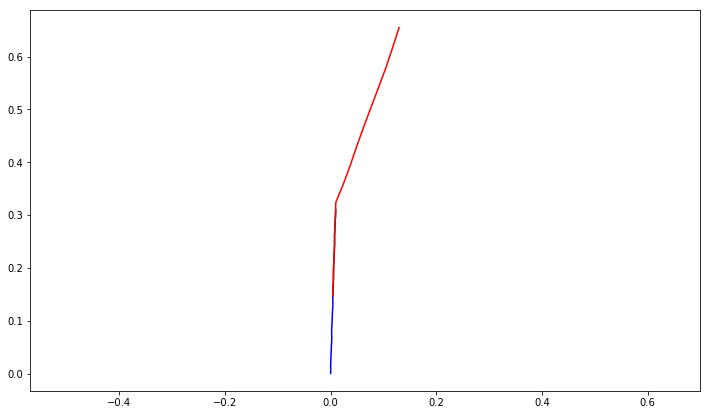

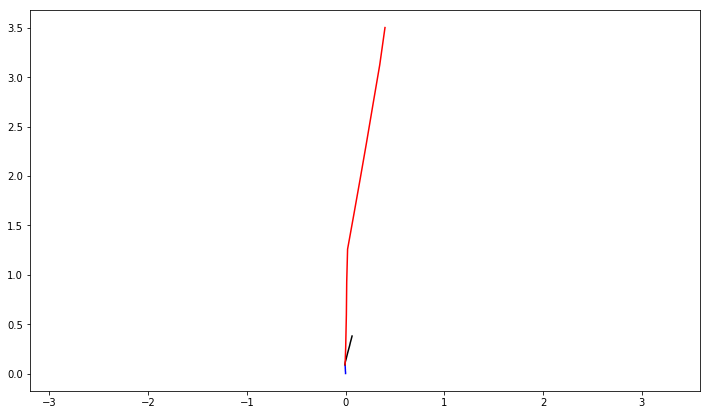

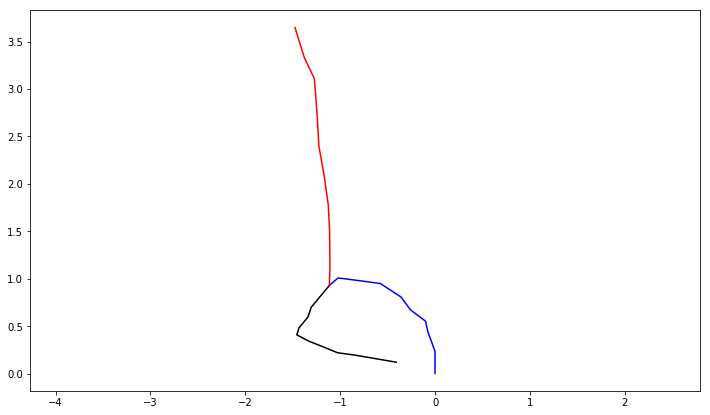

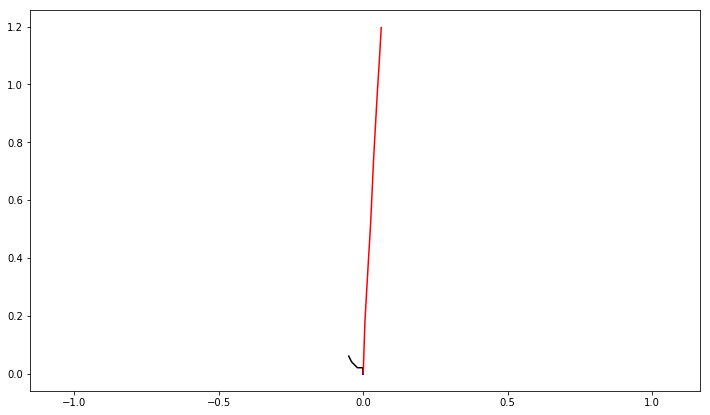

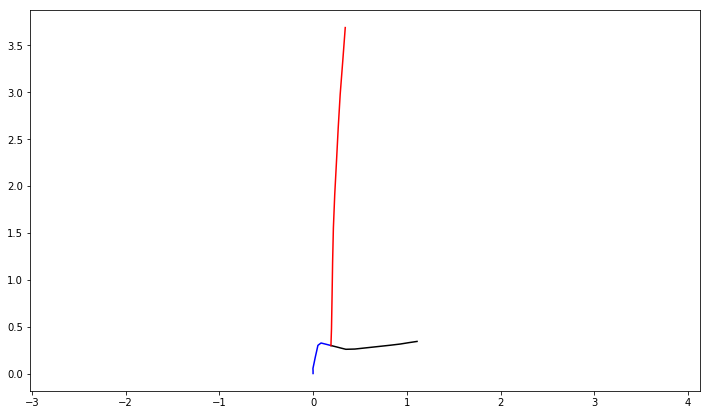

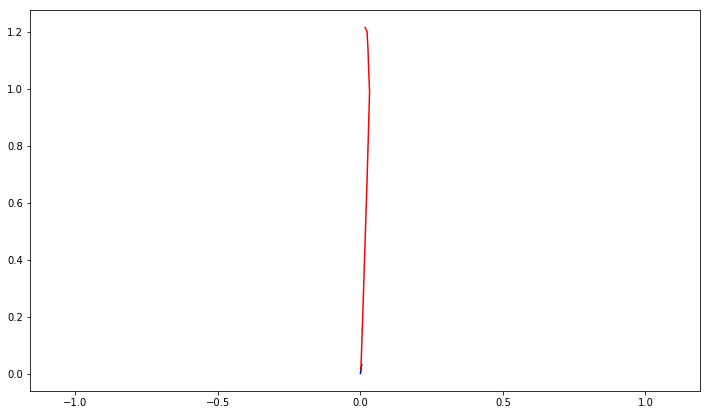

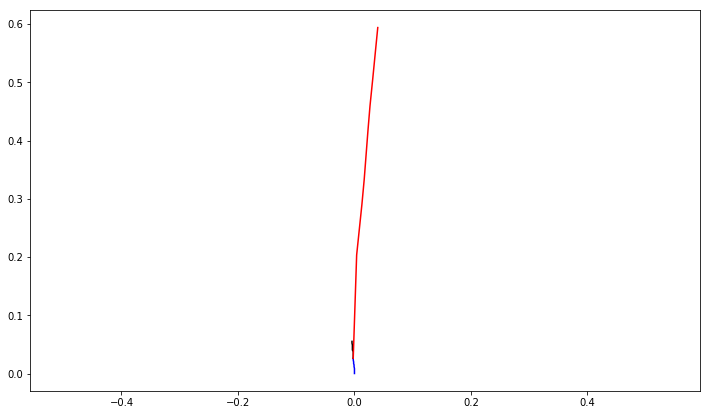

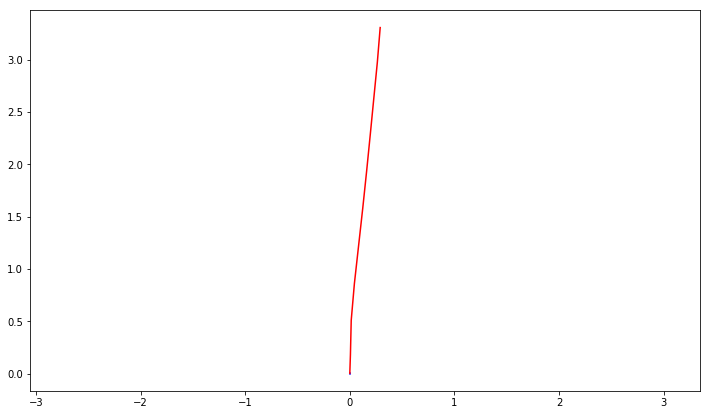

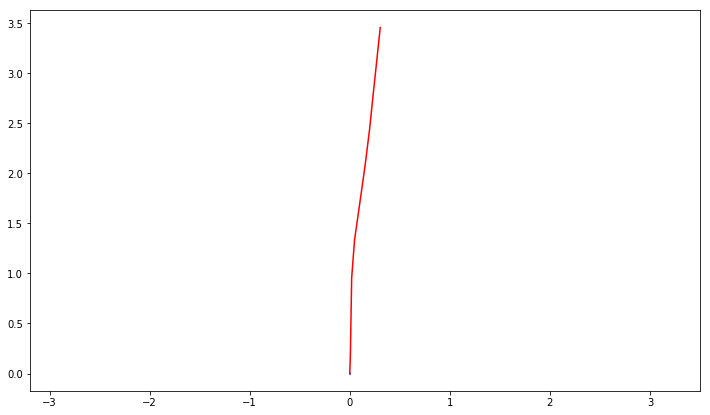

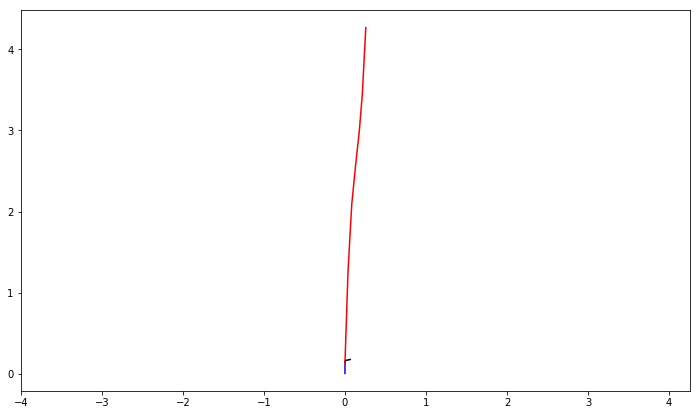

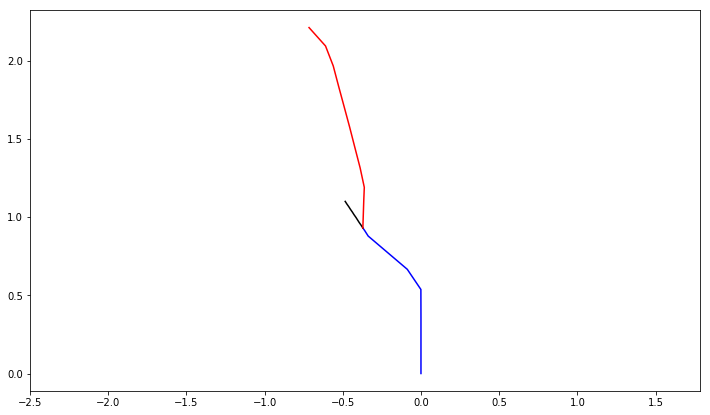

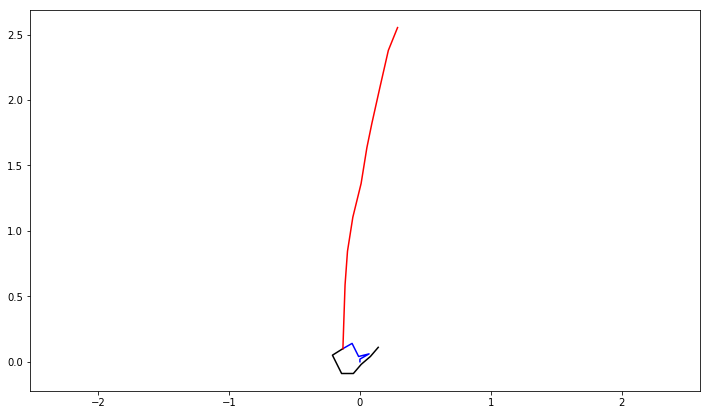

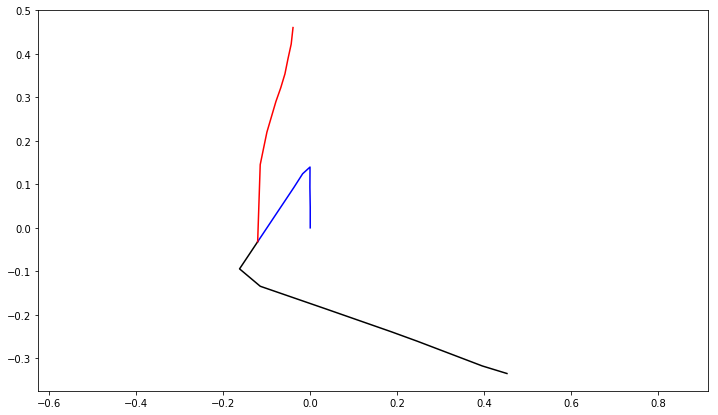

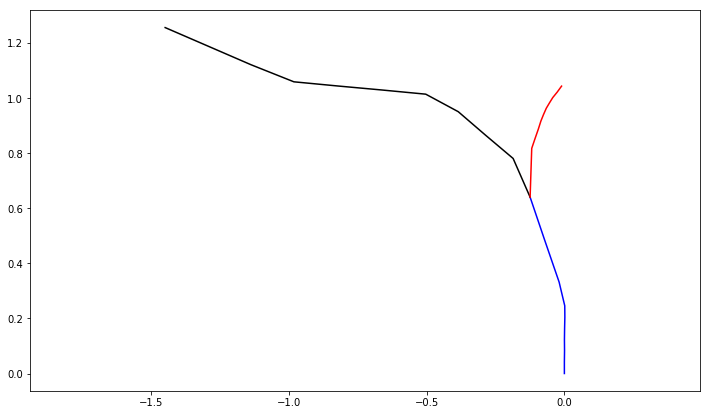

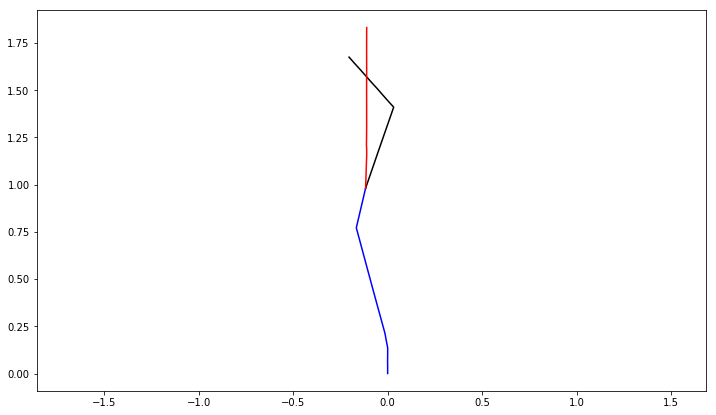

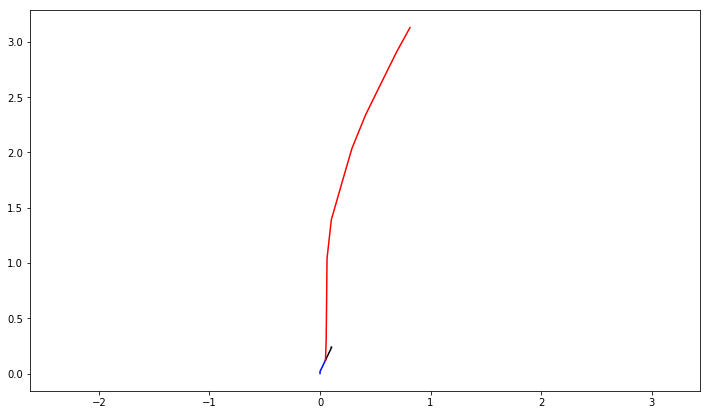

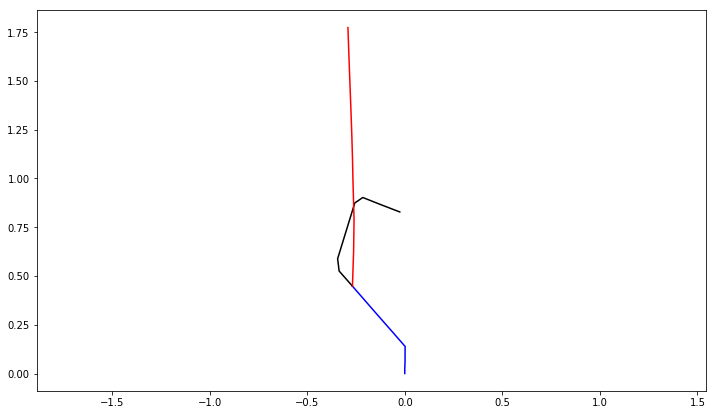

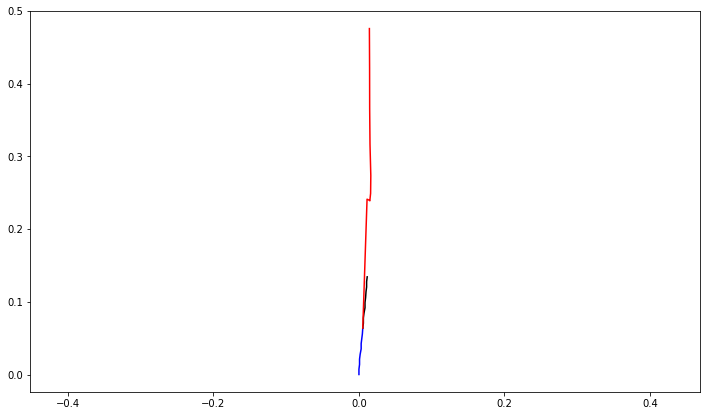

In [21]:
for i in range(20):
    plt.figure(figsize=(12, 7))

    plt.plot(in_coord[:,i*20,0],in_coord[:,i*20,1],c='b')
    plt.plot(gt_coord[:,i*20,0],gt_coord[:,i*20,1],c='k')
    plt.plot(output_coord[:,i*20,0],output_coord[:,i*20,1],c='r')
    plt.axis('equal')

In [ ]:
sum(sum(output_final>1))

In [ ]:
np.sum(output_final>1,axis=1)

In [6]:
len(data)

2463

In [10]:
max_len = 0
for i in range(1,len(data)+1):
    tmp_len = len(data['%s'%i])
    if tmp_len>max_len:
        max_len = tmp_len
        ind = i
    

In [11]:
max_len

360